# Data Description:

You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

# 1. Load Libraries and data
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data
Note: For project purposes, download only train images folder from Kaggle. (See note at the end of problem statement.)
The dataset has to be downloaded from the above Kaggle website.

Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

## 1.1 Import libraries

In [1]:
import os
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1.2 Load data

In [2]:
category_names = [] # Build a feature list by searching for folder names
for folder in os.listdir(os.path.join('train', "")):
    category_names.append(folder)
category_names # There are 12 features

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [3]:
# Create a list of file names that contain the seedling images to be analyzed
fie_names_of_seedling = []
for folder_name in category_names:
    # List down a list of file names in a folder that contain seedling pictures
    for file_name in os.listdir(os.path.join('train', folder_name)):
        fie_names_of_seedling.append([folder_name, file_name])

# View the data frame with file names        
train_seedling_df = pd.DataFrame(fie_names_of_seedling, columns=['seedling_category', 'file_name'])
train_seedling_df.sample(6)

,seedling_category,file_name
1222,Common Chickweed,6a7ea6097.png
2933,Maize,23a60f63f.png
4428,Sugar beet,29d56fd75.png
4284,Small-flowered Cranesbill,d03c0b230.png
2797,Loose Silky-bent,d5f5108df.png
889,Cleavers,cc8f45811.png


In [4]:
train_seedling_df.shape # Check the number of images

(4750, 2)

# 1.3 Read and show certain images

In [5]:
# Check for unique number of categories
num_categories = train_seedling_df['seedling_category'].nunique() 

In [6]:
def convert_img_to_np_data(filepath, filename):
    # Load a image file
    image = cv2.imread(os.path.join('train', filepath, filename))
    return image

In [7]:
fig = plt.figure(1, figsize=(5, num_categories))
image_data = []
image_data_category = []
image_data_df = pd.DataFrame()

# Use the information about file locations to load image data into pandas data frame
for index, data in enumerate(train_seedling_df.iterrows()):
    category_name = train_seedling_df.loc[index, 'seedling_category']
    
    # Pass a file name to load for image data
    temp_img_data = convert_img_to_np_data(category_name, train_seedling_df.loc[index, 'file_name'])
    
    # Store the image data into an array                                      
    image_data.append([category_name, temp_img_data])
    image_data_category.append([category_name])
            
# Create a data frame that contains seedling category names and image data
image_data_df = pd.DataFrame(image_data, columns=['category_name', 'img_data'])

#image_data_df['resize_img_data'] = image_data_df['img_data'].map(lambda image : cv2.resize(image, (200, 200))) 
image_data_df.head(5)        

,category_name,img_data
0,Black-grass,"[[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4..."
1,Black-grass,"[[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4..."
2,Black-grass,"[[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2..."
3,Black-grass,"[[[51, 84, 108], [56, 89, 112], [54, 88, 110],..."
4,Black-grass,"[[[165, 162, 162], [165, 161, 163], [160, 157,..."


<Figure size 360x864 with 0 Axes>

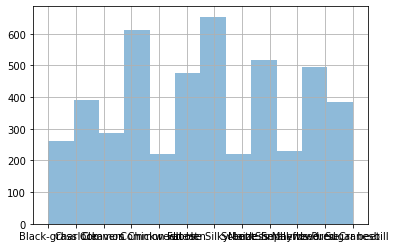

In [12]:
image_data_df['category_name'].hist(bins=12, alpha=0.5)

Data size of various image classes are fairly distributed

In [8]:
image_data_df['img_data'][0:8].map(lambda x:x.shape) # Check for the image sizes

0      (196, 196, 3)
1      (388, 388, 3)
2      (886, 886, 3)
3      (117, 117, 3)
4      (471, 471, 3)
5    (1074, 1074, 3)
6      (251, 251, 3)
7    (1899, 1900, 3)
Name: img_data, dtype: object

The images have different sizes so we have to resize them to fit them to a standard CNN 

In [9]:
image_data_df_backup = image_data_df.copy(deep=True) # Save a backup image

In [10]:
# Resize all images to 100,100
image_data_df['img_data'] = image_data_df_backup['img_data'].map(lambda image : cv2.resize(image, (150, 150))) 

In [11]:
image_data_df['img_data'][0:8].map(lambda x:x.shape)

0    (150, 150, 3)
1    (150, 150, 3)
2    (150, 150, 3)
3    (150, 150, 3)
4    (150, 150, 3)
5    (150, 150, 3)
6    (150, 150, 3)
7    (150, 150, 3)
Name: img_data, dtype: object

A number of sample pictures show that they have different pixels so we resize them to 150, 150.

In [ ]:
image_data_df.info()

## 1.4 Visualization a few images

Label is Black-grass


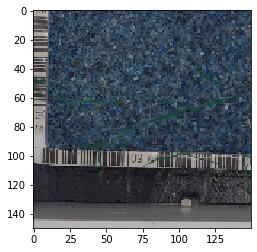

Label is Charlock


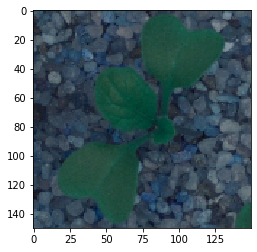

Label is Common Chickweed


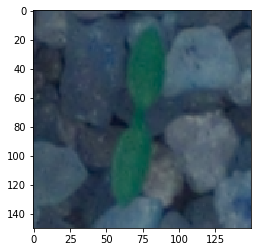

In [13]:
for index in [10,500, 1000]:
    print(f"Label is {image_data_df.loc[index, 'category_name']}")
    plt.imshow(image_data_df.loc[index, 'img_data'])
    plt.show()

# 2.0 Data Pre-processing: (15 Marks)

## 2.1 Normalization

In [15]:
# Normalize the image data 
X = image_data_df['img_data']/255
X.head(3)

0    [[[0.09803921568627451, 0.18823529411764706, 0...
1    [[[0.1607843137254902, 0.1843137254901961, 0.2...
2    [[[0.08235294117647059, 0.11372549019607843, 0...
Name: img_data, dtype: object

## 2.2 Gaussian Blurring

### 2.2.1 Gaussian Blurring for one image

Original Image:



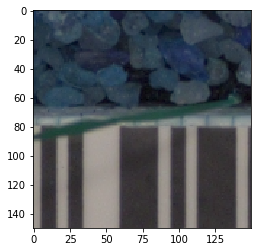


 Output after first gaussian blurring: 



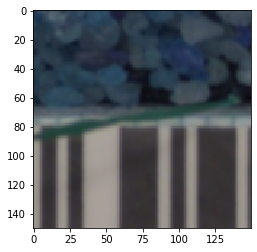


 Output after second gaussian blurring: 



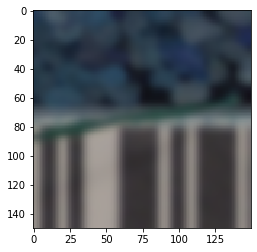

In [16]:
Gaussian1 = cv2.GaussianBlur(image_data_df['img_data'][0], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(image_data_df['img_data'][0], (15, 15), 0)

print('Original Image:\n')
plt.imshow(image_data_df['img_data'][0])
plt.show()

print('\n Output after first gaussian blurring: \n')
#cv2.imshow(window_name, Gaussian1)
plt.imshow(Gaussian1)
plt.show()

print('\n Output after second gaussian blurring: \n')
plt.imshow(Gaussian2)
plt.show()


## 2.3 Visualize data after pre-processing.

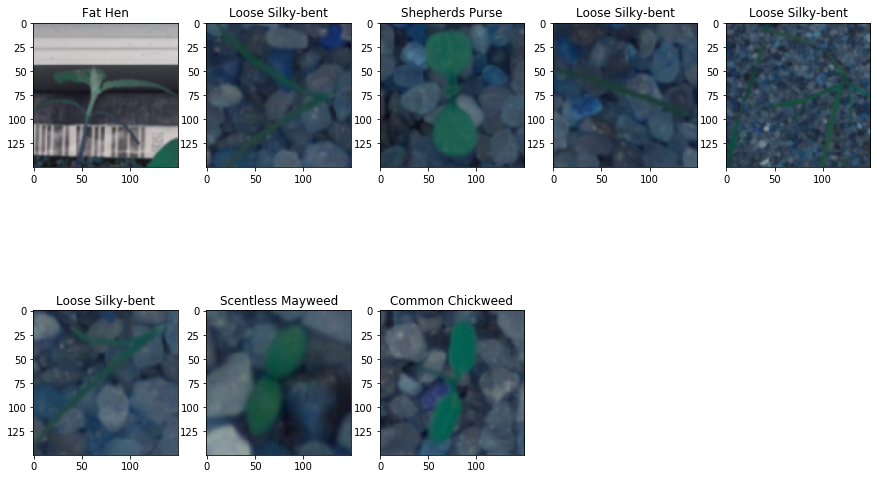

In [17]:
from sklearn.utils import shuffle

randomized_image_data_df = shuffle(image_data_df.copy(deep=True))
randomized_image_data_df = randomized_image_data_df.iloc[:40, :]
randomized_image_data_df['img_data'] = randomized_image_data_df['img_data'].map(lambda x : cv2.GaussianBlur(x, (5, 5), 0))

fig = plt.figure(1, figsize=(15, 15))
randomized_image_data_df.reset_index(drop=True, inplace=True)

for index, df in enumerate(range(8)):
    current_category = str(randomized_image_data_df.loc[index, 'category_name'])

    ax = plt.subplot(3, 5, index+1)
    plt.imshow(randomized_image_data_df.loc[index, 'img_data'])
    plt.title(current_category)
    
plt.show()

In [18]:
randomized_image_data_df.head(5)

,category_name,img_data
0,Fat Hen,"[[[147, 148, 151], [147, 147, 151], [146, 147,..."
1,Loose Silky-bent,"[[[54, 81, 103], [54, 81, 103], [55, 82, 103],..."
2,Shepherds Purse,"[[[50, 62, 79], [49, 62, 79], [49, 62, 78], [4..."
3,Loose Silky-bent,"[[[38, 55, 73], [36, 52, 71], [32, 48, 67], [2..."
4,Loose Silky-bent,"[[[66, 84, 103], [66, 84, 103], [66, 85, 105],..."


# 3.0 Make data compatible: (10 Marks)

## 3.1 Split Normal Data
Split the dataset into training, testing, and validation set. <br>
(Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

In [55]:
y = image_data_df['category_name']
X = X.map(lambda x : cv2.GaussianBlur(x, (5, 5), 0))

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Label: Black-grass


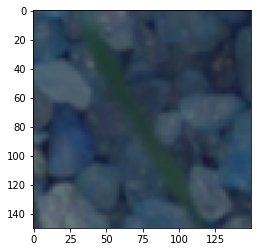

In [24]:
%matplotlib inline

print("Label: {}".format(y[3]))

plt.imshow(X[3]) # Image after a blurring effect
plt.show()

In [25]:
X_train.head(2)

2710    [[[0.2261642156862745, 0.27720588235294114, 0....
1188    [[[0.2408700980392157, 0.28106617647058824, 0....
Name: img_data, dtype: object

In [ ]:
train_seedling_df.loc[0, 'seedling_category']

## 3.2 Reshape data into shapes compatible with Keras models.

In [56]:
# Reshape training data set to be compatible with Keras models
X_train = np.array([x for x in X_train.ravel()])
X_train.shape

# Reshape test data set to be compatible with Keras models
X_test = np.array([x for x in X_test.ravel()])
X_test.shape

X_validation = np.array([x for x in X_validation.ravel()])
X_validation.shape

(713, 150, 150, 3)

## 3.3 Create images of large sizes for future use

### 3.3.1 Large image

In [ ]:
large_image_df = image_data_df.copy(deep=True)
#small_image_df = image_data_df.copy(deep=True)

large_image_df['img_data'] = large_image_df['img_data'].map(lambda image : cv2.resize(image, (300, 300))) 

X = large_image_df['img_data']/255
y = large_image_df['category_name']

#X = np.array(X.values).reshape(X.shape[0], 196, 196, 3)
large_X_train, large_X_test, large_y_train, large_y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 3.3.2 Small image

In [91]:
small_X_test.head(3)

3817    [[[0.18823529411764706, 0.2549019607843137, 0....
1075    [[[0.11372549019607843, 0.19607843137254902, 0...
296     [[[0.32941176470588235, 0.3254901960784314, 0....
Name: img_data, dtype: object

In [93]:
small_image_df = image_data_df_backup.copy(deep=True)
small_image_df['img_data'] = small_image_df['img_data'].map(lambda image : cv2.resize(image, (100, 100))) 

X = small_image_df['img_data']/255
y = small_image_df['category_name']

#X = np.array(X.values).reshape(X.shape[0], 196, 196, 3)
small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

number_classes = ""
if type(number_classes) is not int:
    number_classes = len(number_classes)

# Convert string-based labels to numerical labels
small_y_test = small_y_test.astype('category').map(lambda x: label_dict[x])

# Convert numerical labels to multi class labels
small_y_test = tensorflow.keras.utils.to_categorical(small_y_test, (number_classes))

small_X_test = np.array([x for x in small_X_test.ravel()])
small_X_test = small_X_test.astype('float32')
small_X_test.shape

(1425, 100, 100, 3)

## 3.3 Cleanse target dataset

In [87]:
# Generate categorical dictionary for label
label_dict = {}
for i, category in enumerate(category_names):
    label_dict[category] = i
    
print(label_dict)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


In [57]:
number_classes = ""
if type(number_classes) is not int:
    number_classes = len(number_classes)

# Convert string-based labels to numerical labels
y_test = y_test.astype('category').map(lambda x: label_dict[x])
y_train = y_train.astype('category').map(lambda x: label_dict[x])
y_validation = y_validation.astype('category').map(lambda x: label_dict[x])

# Convert numerical labels to multi class labels
y_train = tensorflow.keras.utils.to_categorical(y_train, (number_classes))
y_test = tensorflow.keras.utils.to_categorical(y_test, (number_classes))
y_validation = tensorflow.keras.utils.to_categorical(y_validation, (number_classes))

In [32]:
y_train[0] # Show multi class labels

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
X_train[0].shape

(150, 150, 3)

# 4.0 CNN Training

## 4.1 Convolutional Neural Network
Define the convolutional network with input shape (150, 150, 3)

In [34]:
# Load a pre-trained model that has been trained a few hours ago
model = tensorflow.keras.models.load_model('pre-trained.h5')

In [71]:
len(category_names)

12

In [72]:
# Create a CNN model
#model = None
#if model is None:
model = Sequential()

model.add(
    Conv2D(32, (3, 3), # Filter size 3x3
           padding='same',
           input_shape=X_train[0].shape
           )
    )

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(
    Conv2D(64, (3, 3), padding='same')
    )

model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(category_names)))
model.add(Activation('softmax'))

In [73]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [74]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
    )

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
activation_18 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
activation_19 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 74, 74, 64)       

In [58]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_validation = X_validation.astype('float32')
#X_train_np = tensorflow.keras.utils.to_categorical(X_train_np, 12)

# Verify the sape of various features
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(3325, 150, 150, 3)
(712, 150, 150, 3)
(713, 150, 150, 3)


## 4.2 Build a model

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Save best weights achieved for future training
model_checkpoint =  ModelCheckpoint(
    'cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
    period=1
    )

In [59]:
# Verify that the shape for training and validation data for CNN model is correct
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((3325, 150, 150, 3), (3325, 12), (713, 150, 150, 3), (713, 12))

Train on 3325 samples, validate on 712 samples
Epoch 1/15
3200/3325 [===========================>..] - ETA: 20s - loss: 2.4690 - accuracy: 0.1209
Epoch 00001: val_loss improved from inf to 2.42236, saving model to cifar_cnn_checkpoint_01_loss2.4224.h5
3325/3325 [==============================] - 599s 180ms/sample - loss: 2.4655 - accuracy: 0.1221 - val_loss: 2.4224 - val_accuracy: 0.1545
Epoch 2/15
3200/3325 [===========================>..] - ETA: 18s - loss: 2.4204 - accuracy: 0.1384
Epoch 00002: val_loss improved from 2.42236 to 2.38762, saving model to cifar_cnn_checkpoint_02_loss2.3876.h5
3325/3325 [==============================] - 527s 158ms/sample - loss: 2.4182 - accuracy: 0.1395 - val_loss: 2.3876 - val_accuracy: 0.1292
Epoch 3/15
3200/3325 [===========================>..] - ETA: 16s - loss: 2.3351 - accuracy: 0.1988
Epoch 00003: val_loss improved from 2.38762 to 2.21399, saving model to cifar_cnn_checkpoint_03_loss2.2140.h5
3325/3325 [==============================] - 479s 14

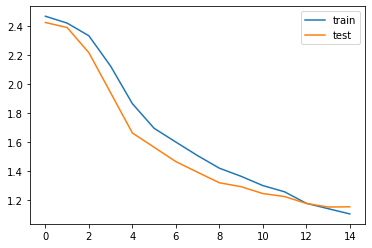

In [79]:
# Set the batch size, number of epochs.
batch_size = 200
num_classes = 10
epochs = 15

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(
        X_test, 
        y_test
        ),
    shuffle=True,
    verbose=1,
    callbacks=[
               early_stopping,
               model_checkpoint
               ]
    )

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 4.3 Save or retrain 100x100 images
Trained CNN network models for 100x100 image sizes are stored in h5 files that can be retrieved for retraining or prediction.


In [81]:
# Save the model for future training
model.save('pre-trained_size_100x100.h5') 

In [84]:
# Load a model that has been trained and stored as a h5 file
model = tensorflow.keras.models.load_model('pre-trained_100x100.h5')

## 4.4 Save or retrain 150x150 images
Trained CNN network models for 150x150 image sizes are stored in h5 files that can be retrieved for retraining or prediction.

In [80]:
# Save the model for future training
model.save('pre-trained_size_150x150.h5') 

In [ ]:
# Load a model that has been trained and stored as a h5 file
model = tf.keras.models.load_model('pre-trained_size_150x150.h5')

# 5.0 Fit and evaluate model and print confusion matrix. (10 Marks)

## 5.1 Evaluate the accuracy of the test model trained using image sizes 100x100

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

# Load a CNN model from a h5 file with a model trained in previous steps
new_model = tensorflow.keras.models.load_model('pre-trained_100x100.h5')

# Score trained model.
scores = new_model.evaluate(small_X_test, small_y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1425/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.8599260802018015
Test accuracy: 0.7361404


In [ ]:
The prediction accuracy for test dataset 

## 5.2 Fit the trained model to the test dataset with small image size 100x100

In [97]:
# Flatten the multi class target dataset into an array
y_pred = new_model.predict(small_X_test)
y_pred_array = [np.array((np.argmax(data)).flatten()) for data in y_pred]
y_pred_array = [data.astype(int) for data in y_pred_array]

# Flatten the multi class target dataset into an array
y_test_array = [np.array((np.argmax(data)).flatten()) for data in small_y_test]
y_test_array = [data.astype(int) for data in y_test_array]

In [98]:
cm = confusion_matrix(y_test_array, y_pred_array)
print(cm)

[[ 24   0   1   0   4   2  52   1   0   0   0   3]
 [  0  96   3   0   0   3   0   1   4   4   5   4]
 [  0   1  63   1   3   5   2   1   8   1   1   0]
 [  0   0   0 178   0   2   0   4   0   5   3   1]
 [  4   0   2   0  22  14  21   0   1   0   0   1]
 [  2   0   2   6   1 108   9   1   3   2   8   1]
 [  9   0   0   0   3   8 172   0   1   0   2   3]
 [  0   1   0  10   0   3   1  49   0   1   1   4]
 [  1   3   2   8   0   6   4   1 101   2   0   8]
 [  0   0   0   7   0   3   0   3  11  32   1   1]
 [  0   2   1   1   0   1   1   4   0   3 137   1]
 [  2   3   0   4   5  19   0   4   4   0  10  67]]


In [ ]:
0.0164	 $ 0.16 

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

# 6.0 Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

## 6.1 Prediction for x_test vs y predicted for image sizes 100x100

In [102]:
label_dict = {}
for i, category in enumerate(category_names):
    label_dict[i] = category
    
print(label_dict)

{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


--------------------
The actual result for Charlock
Actual test data = Charlock, and predicted test data = Charlock


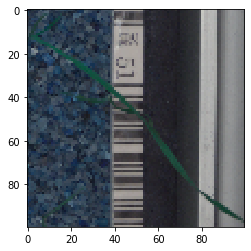

--------------------
The actual result for Fat Hen
Actual test data = Fat Hen, and predicted test data = Fat Hen


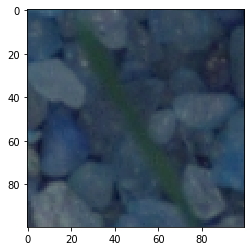

--------------------
The actual result for Maize
Actual test data = Maize, and predicted test data = Maize


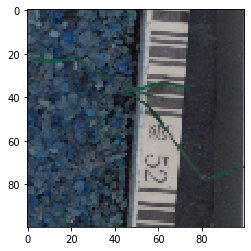

--------------------
The actual result for Cleavers
Actual test data = Cleavers, and predicted test data = Cleavers


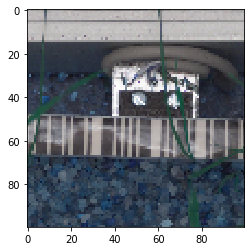

--------------------
The actual result for Fat Hen
Actual test data = Fat Hen, and predicted test data = Fat Hen


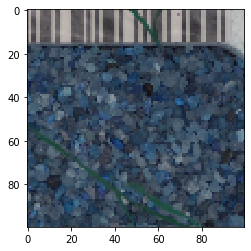

In [107]:
for index in [2,3,33,36,59]:
    y_test_actual = y_test_array[index]
    y_test_prediction = y_pred_array[index]
    print("--------------------")
    print(f"The actual result for {label_dict[y_test_actual[0]]}")
    print(f"Actual test data = {label_dict[y_test_actual[0]]}, and predicted test data = {label_dict[y_test_prediction[0]]}")
    plt.imshow(X[index]) # Image after a blurring effect
    plt.show()